In [2]:
#Logistic Regression
# We will now be importing some required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

#Loading the dataset
load = pd.read_excel('atus/ehresp_2014.xlsx')

In the cell below I rearranged the columns, placing BMI in the final column and removing the household and respondent IDs( TUCASEID, TULINENO), as those are not required for anything we're doing. 

In [3]:
dataset = load[['eeincome1', 'erhhch', 'erincome', 'erspemch', 'ertpreat', 'ertseat', 'ethgt', 'etwgt', 'eudietsoda', 'eudrink', 'eueat', 'euexercise', 'euexfreq', 'eufastfd', 'eufastfdfrq', 'euffyday', 'eufdsit', 'eufinlwgt', 'eusnap', 'eugenhth', 'eugroshp', 'euhgt', 'euinclvl', 'euincome2', 'eumeat', 'eumilk', 'euprpmel', 'eusoda', 'eustores', 'eustreason', 'eutherm', 'euwgt', 'euwic', 'exincome1', 'erbmi']]

In [4]:
X = dataset.iloc[:,1:34].values
y = dataset.iloc[:,-1].values

Verified the shape of the arrays. 

In [52]:
X.shape

(11212, 33)

In [6]:
y.shape

(11212,)

# One Hot Encoding  

In [7]:
##From the scikit.preprocessing library we first import few classes
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder_X = LabelEncoder()
#X[:,0] = labelencoder_X.fit_transform(X[:,0])
#onehotencoder = OneHotEncoder(categorical_features=[0])
#X = onehotencoder.fit_transform(X).toarray()

# Removing the extra dummy variable
#X = X[:, 1:]

# Classifying BMI

NIH classifies BMI in the following ranges

 
BMI Categories: 
- Underweight = <18.5
- Normal weight = 18.5–24.9 
- Overweight = 25–29.9 
- Obesity = BMI of 30 or greater

In [47]:
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

3.0


In [9]:
#Fitting Multiple Linear Regression to Training Set
from sklearn.linear_model import LinearRegression
mlrObj = LinearRegression()
mlrObj.fit(X_train,y_train)

#Predicting on the Test Set
y_pred = mlrObj.predict(X_test)

In [10]:
#Mean squared error for the model 
from sklearn.metrics import mean_squared_error

print('Mean squared error of the model on the test set: ')
print(mean_squared_error(y_test, y_pred))

Mean squared error of the model on the test set: 
11.900123025670776


In [50]:
print('Model intercept: ')
print(mlrObj.intercept_)

print('\n')
print('Model coefficients: ')
i=0
for i in range(0,33):
    print(dataset.columns[i+1] + ': ', mlrObj.coef_[i])
    

Model intercept: 
26.244036662334356


Model coefficients: 
erhhch:  0.03826517615370927
erincome:  -0.03410446073381049
erspemch:  -0.03786187386518939
ertpreat:  -0.0004742193336747871
ertseat:  -0.06633107335264411
ethgt:  1.689207632944283
etwgt:  0.8639183474467823
eudietsoda:  0.03338488486090803
eudrink:  0.18242788173012897
eueat:  -0.03590319198369405
euexercise:  -0.17118436203538157
euexfreq:  -0.2595773131626689
eufastfd:  -0.09170805852026451
eufastfdfrq:  -0.24810071649756585
euffyday:  0.09574475203175127
eufdsit:  -0.046325797681586976
eufinlwgt:  -0.05905439543403786
eusnap:  -0.22299907980578104
eugenhth:  0.3072084644802624
eugroshp:  -0.11857218680659408
euhgt:  -0.3433049305420455
euinclvl:  -0.04476077732287573
euincome2:  0.07103852334555887
eumeat:  0.13007840375356713
eumilk:  -0.02347108586491079
euprpmel:  -0.27887332889408906
eusoda:  0.2127344217767325
eustores:  0.020688748734006758
eustreason:  0.1168066846820339
eutherm:  0.21354288431130697
euwgt:  7.43

In [38]:
from scipy.stats.stats import pearsonr

def plot(x, xlabel, y, ylabel):
    plt.scatter(x, \
                y, \
                color="red", \
                alpha=0.1)
    plt.title(ylabel + ' by ' + xlabel)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

    print("Pearson's correlation coefficient: ")
    print(pearsonr(x, y))

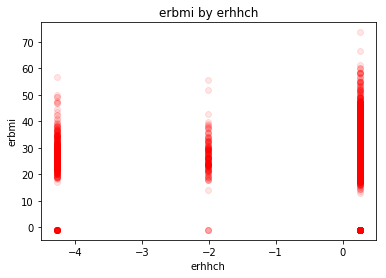

Pearson's correlation coefficient: 
(0.0029840081031329924, 0.791542141310876)


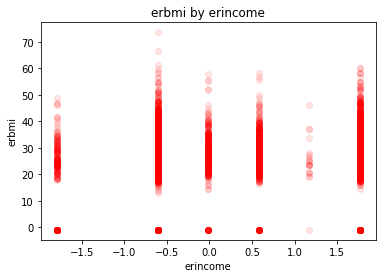

Pearson's correlation coefficient: 
(0.07837687013027396, 3.578146549104171e-12)


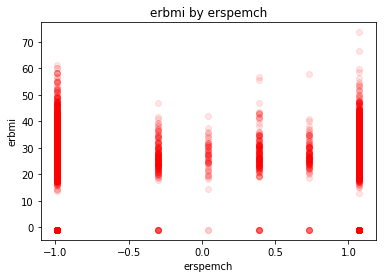

Pearson's correlation coefficient: 
(0.006903684729698989, 0.540868639261205)


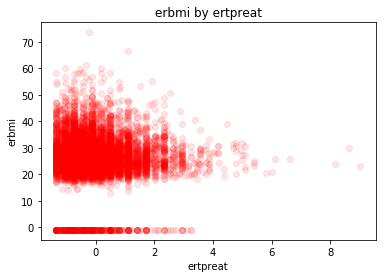

Pearson's correlation coefficient: 
(-0.020940687338706528, 0.06359320591523954)


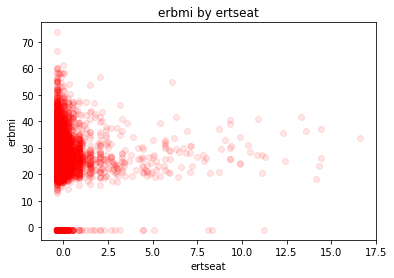

Pearson's correlation coefficient: 
(0.003971260054220739, 0.7250219641209212)


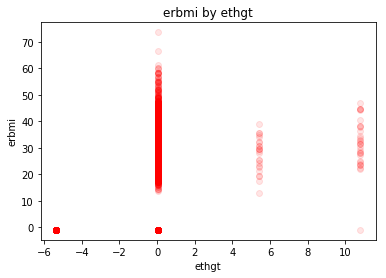

Pearson's correlation coefficient: 
(0.2868473915433711, 1.6061621110447594e-148)


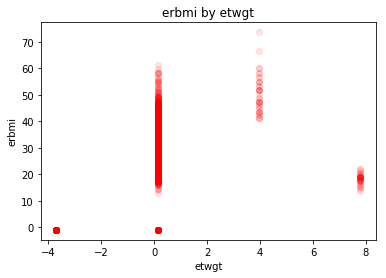

Pearson's correlation coefficient: 
(0.5671699296654897, 0.0)


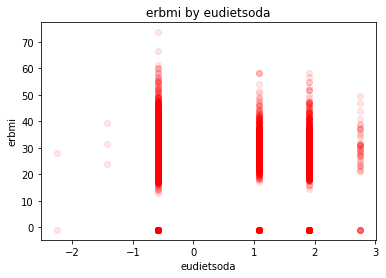

Pearson's correlation coefficient: 
(0.02320045611797732, 0.03985457398755637)


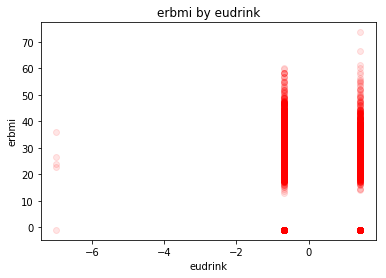

Pearson's correlation coefficient: 
(-0.026235966737742138, 0.020112298983659627)


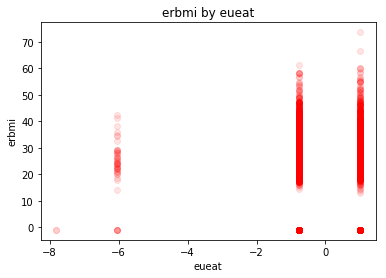

Pearson's correlation coefficient: 
(0.02361541175883844, 0.03643648150312804)


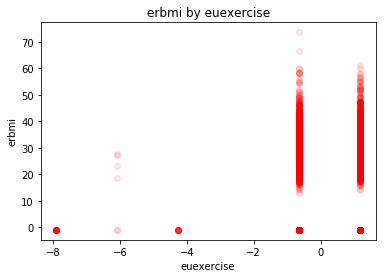

Pearson's correlation coefficient: 
(0.1550490697548084, 2.010708036193998e-43)


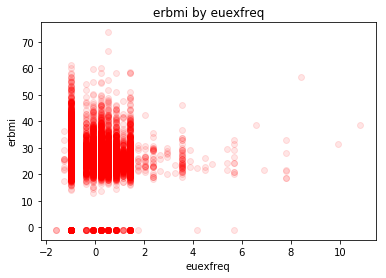

Pearson's correlation coefficient: 
(-0.05519591896668724, 9.94625379904728e-07)


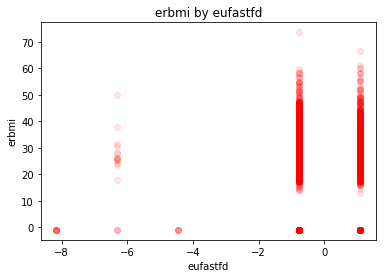

Pearson's correlation coefficient: 
(-0.02357651486702516, 0.036745906064920765)


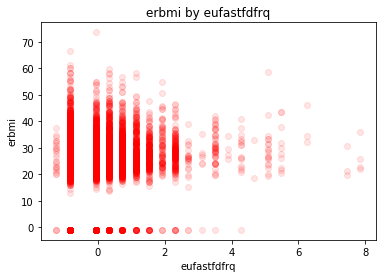

Pearson's correlation coefficient: 
(0.08219742359812644, 3.0320538316615787e-13)


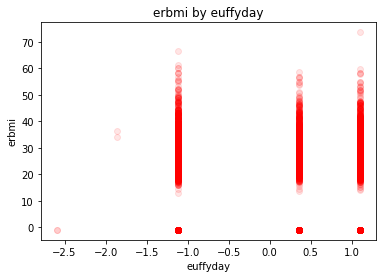

Pearson's correlation coefficient: 
(0.0758644064802287, 1.703925996038503e-11)


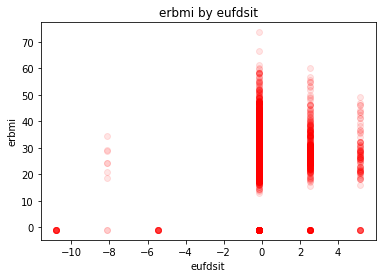

Pearson's correlation coefficient: 
(0.11423985740458113, 3.245552041809225e-24)


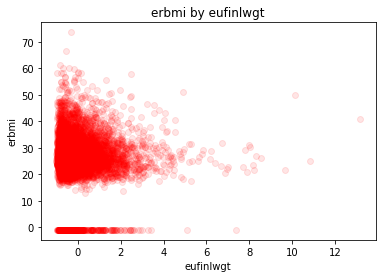

Pearson's correlation coefficient: 
(-0.014034958120648868, 0.21379222099794484)


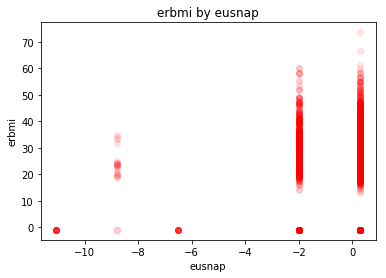

Pearson's correlation coefficient: 
(0.07576871025804191, 1.8065179797477104e-11)


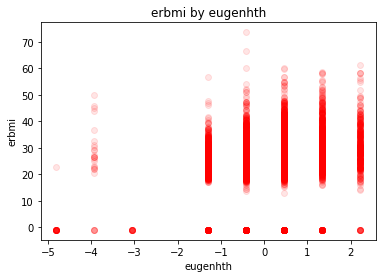

Pearson's correlation coefficient: 
(0.24490148774970846, 1.5398469200971663e-107)


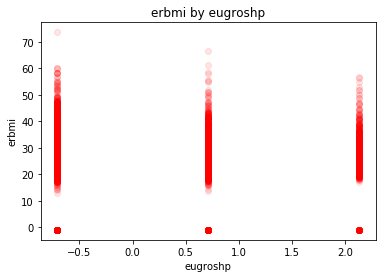

Pearson's correlation coefficient: 
(0.022333618062840184, 0.04787874085267978)


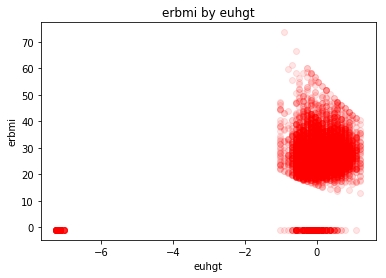

Pearson's correlation coefficient: 
(0.37373490037872964, 1.141190287335811e-258)


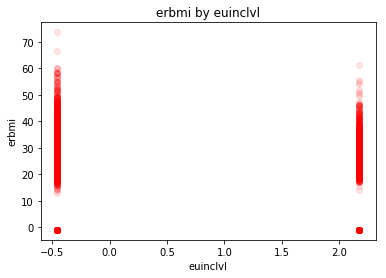

Pearson's correlation coefficient: 
(-0.005008494946009288, 0.6573105775659481)


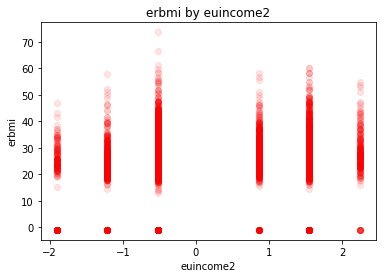

Pearson's correlation coefficient: 
(0.09941875869786561, 1.0668156002894905e-18)


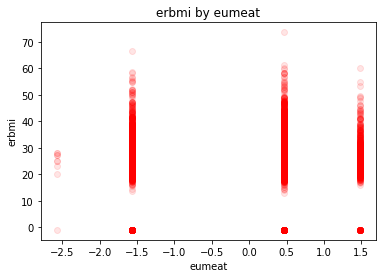

Pearson's correlation coefficient: 
(-0.026447178393327796, 0.019131226756608773)


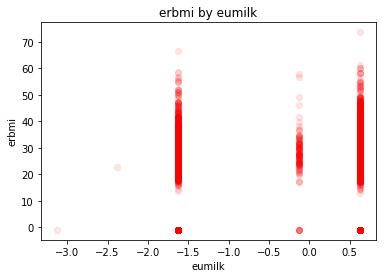

Pearson's correlation coefficient: 
(-0.01984907326776343, 0.07869623227041303)


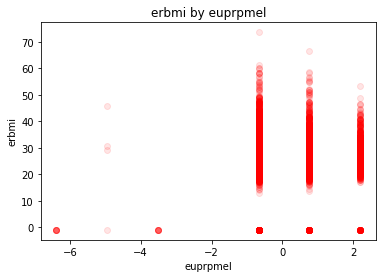

Pearson's correlation coefficient: 
(0.05814742641938646, 2.539562203046106e-07)


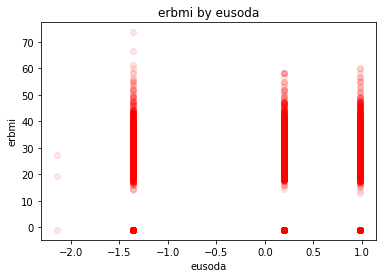

Pearson's correlation coefficient: 
(0.022126943273438015, 0.04998058184068615)


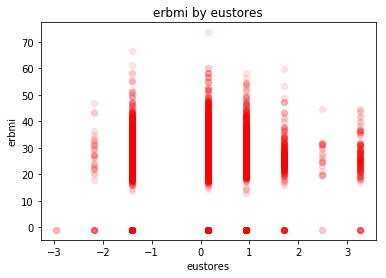

Pearson's correlation coefficient: 
(-0.011202975936909552, 0.32103521029508664)


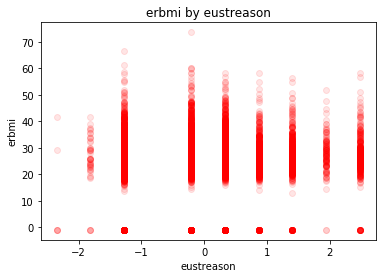

Pearson's correlation coefficient: 
(-0.010426374611338295, 0.3557261620566846)


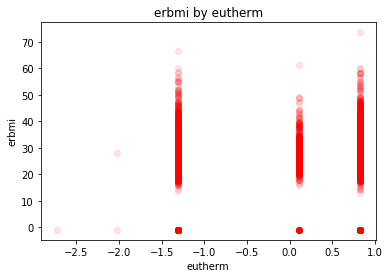

Pearson's correlation coefficient: 
(0.002707093981953893, 0.8105001759094252)


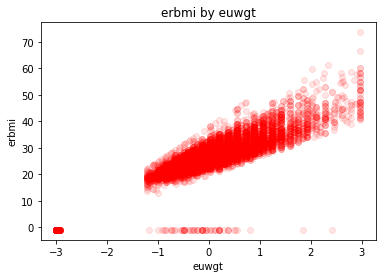

Pearson's correlation coefficient: 
(0.891142797828718, 0.0)


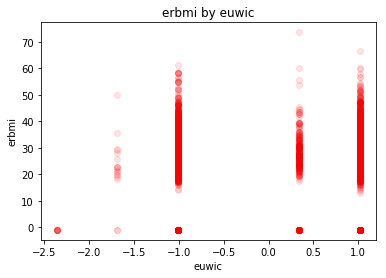

Pearson's correlation coefficient: 
(-0.03788110396087836, 0.0007893090052446179)


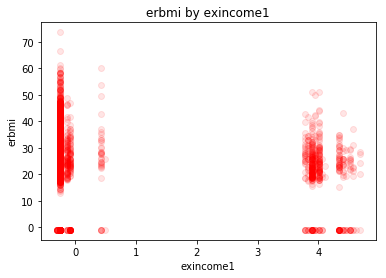

Pearson's correlation coefficient: 
(-0.14116025917940636, 3.238683447893556e-36)


In [51]:
for i in range(0,33):
    plot(x = X_train[:, i], \
         xlabel = dataset.columns[i+1], \
         y = y_train, \
         ylabel = dataset.columns[34])